In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
df=pd.read_csv('loan.csv')

In [70]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [71]:
#Exploratory data analysis
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [73]:
pd.crosstab(df['Credit_History'],df['Loan_Status'],margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


In [74]:
df[df.duplicated(subset=['Loan_ID'],keep=False)]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [75]:
df.select_dtypes(include=['object']).head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y


In [76]:
ordinal={
    'Education':['Not Graduate','Graduate'],
    'Dependents':['0','1','2','3+'],
    'Property_Area':['Rural','Semiurban','Urban']
}
nominal=['Self_Employed','Gender','Married','Loan_Status']
def convert_to_categorical(df:pd.DataFrame,ordinal:dict,nominal:list):
    # Convert ordinal categorical variables to categorical
    for col, categories in ordinal.items():
        df[col] = pd.Categorical(df[col], categories=categories, ordered=True)

    for col in nominal:
        df[col] = pd.Categorical(df[col])

    return df
df=convert_to_categorical(df,ordinal,nominal)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Loan_ID            614 non-null    object  
 1   Gender             601 non-null    category
 2   Married            611 non-null    category
 3   Dependents         599 non-null    category
 4   Education          614 non-null    category
 5   Self_Employed      582 non-null    category
 6   ApplicantIncome    614 non-null    int64   
 7   CoapplicantIncome  614 non-null    float64 
 8   LoanAmount         592 non-null    float64 
 9   Loan_Amount_Term   600 non-null    float64 
 10  Credit_History     564 non-null    float64 
 11  Property_Area      614 non-null    category
 12  Loan_Status        614 non-null    category
dtypes: category(7), float64(4), int64(1), object(1)
memory usage: 34.0+ KB


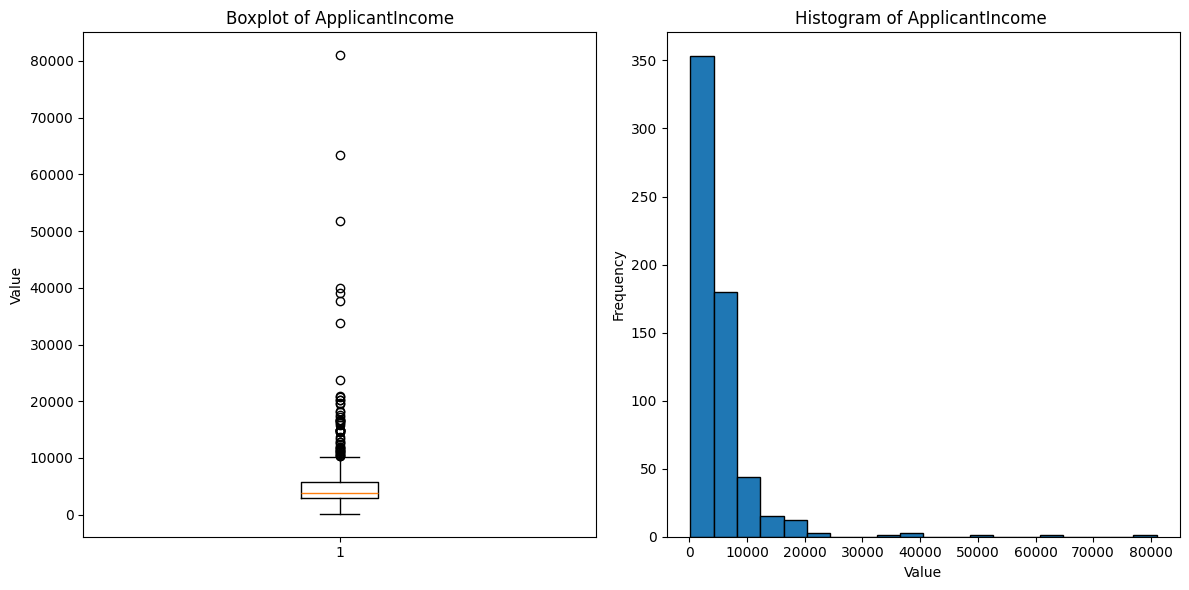

In [78]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.boxplot(df['ApplicantIncome'])
plt.title('Boxplot of ApplicantIncome')
plt.ylabel('Value')

# Histogram on the right
plt.subplot(1, 2, 2)
plt.hist(df['ApplicantIncome'], bins=20, edgecolor='black')
plt.title('Histogram of ApplicantIncome ')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

<Axes: title={'center': 'ApplicantIncome'}, xlabel='Education'>

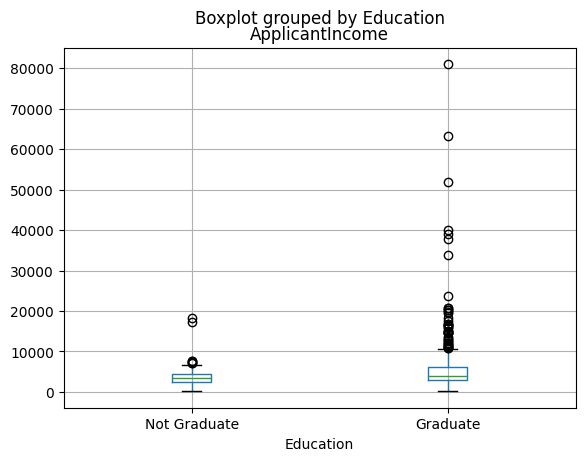

In [79]:
df.boxplot(column="ApplicantIncome", by="Education")

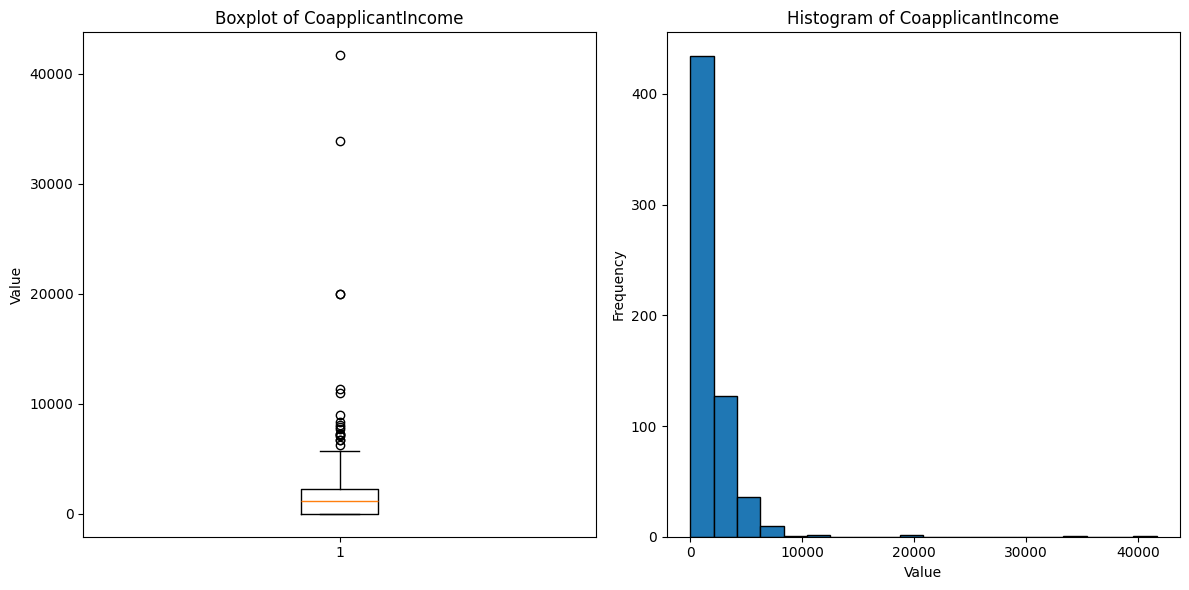

In [80]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.boxplot(df['CoapplicantIncome'])
plt.title('Boxplot of CoapplicantIncome')
plt.ylabel('Value')

# Histogram on the right
plt.subplot(1, 2, 2)
plt.hist(df['CoapplicantIncome'], bins=20, edgecolor='black')
plt.title('Histogram of CoapplicantIncome')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [81]:
IQR=df['CoapplicantIncome'].quantile(0.75)-df['CoapplicantIncome'].quantile(0.25)
IQR

np.float64(2297.25)

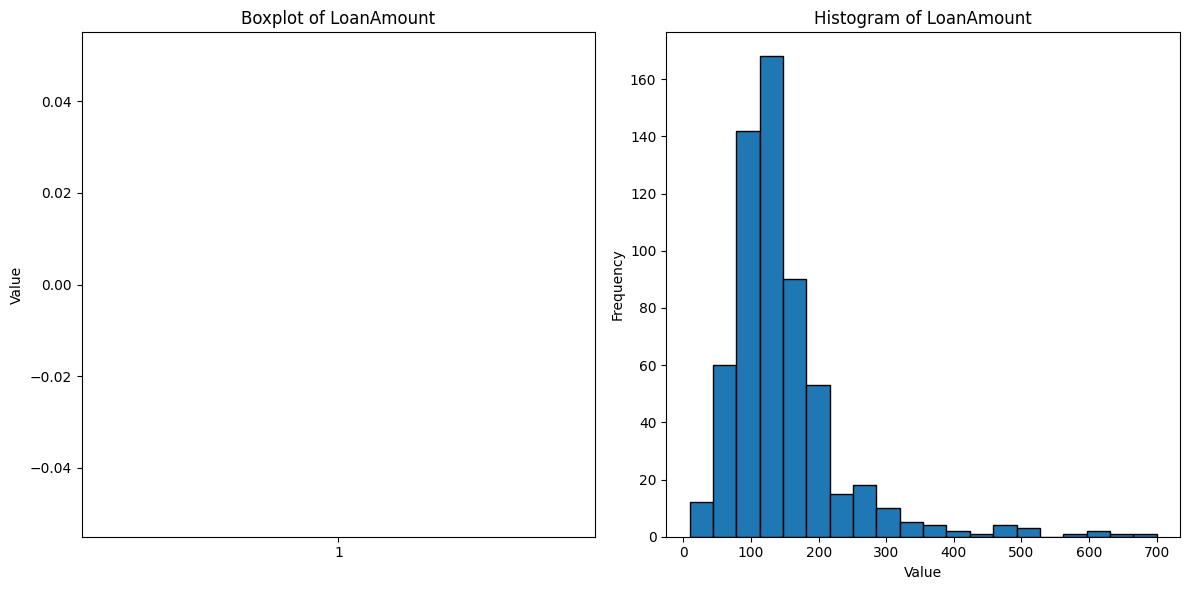

In [82]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.boxplot(df['LoanAmount'])
plt.title('Boxplot of LoanAmount')
plt.ylabel('Value')

# Histogram on the right
plt.subplot(1, 2, 2)
plt.hist(df['LoanAmount'], bins=20, edgecolor='black')
plt.title('Histogram of LoanAmount')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

DEALING WITH MISSING VALUES


<Axes: >

<Figure size 0x600 with 0 Axes>

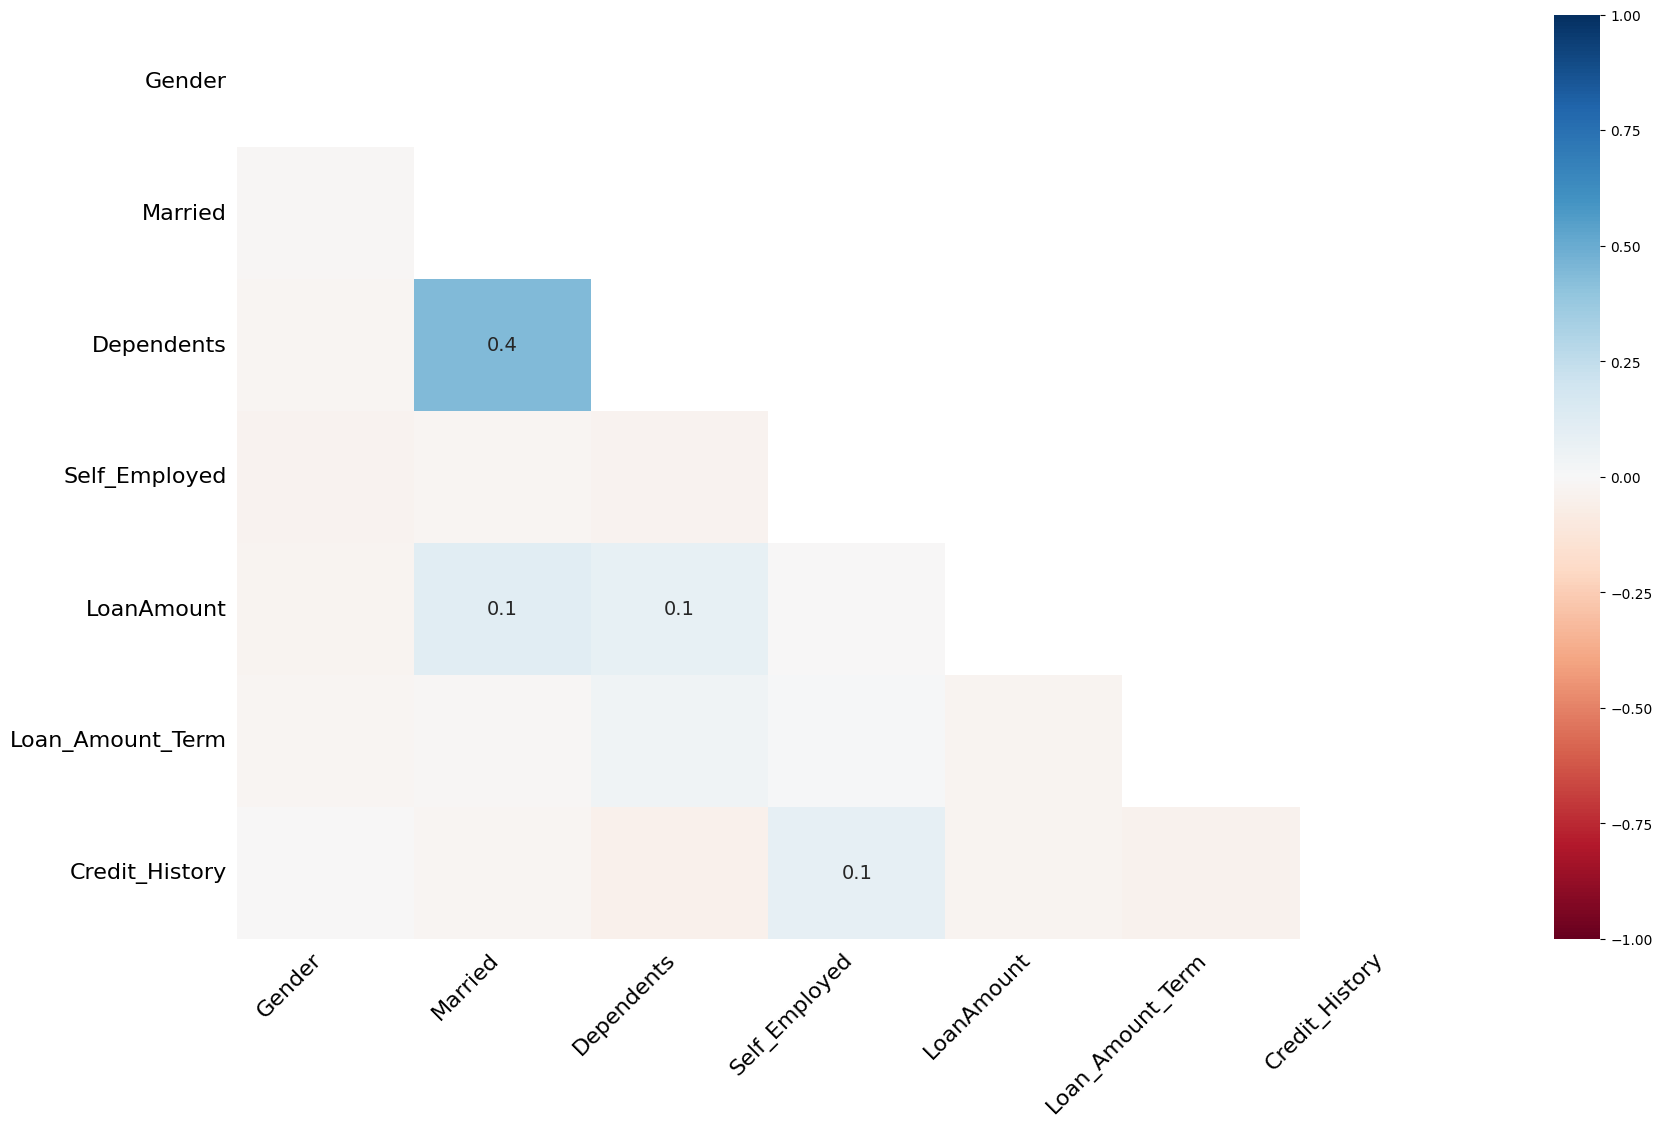

In [83]:
import missingno as msno
plt.figure(figsize=(0,6))
msno.heatmap(df)


In [84]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [85]:
df.fillna({'Gender': df['Gender'].mode()[0],
           'Married': df['Married'].mode()[0],
           'Dependents': df['Dependents'].mode()[0],
           'Self_Employed': df['Self_Employed'].mode()[0],  

           'LoanAmount': df['LoanAmount'].median(),
           'Loan_Amount_Term': df['Loan_Amount_Term'].median(),
           'Credit_History': df['Credit_History'].median(),
           'Property_Area': df['Property_Area'].mode()[0]}, inplace=True)
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<Axes: >

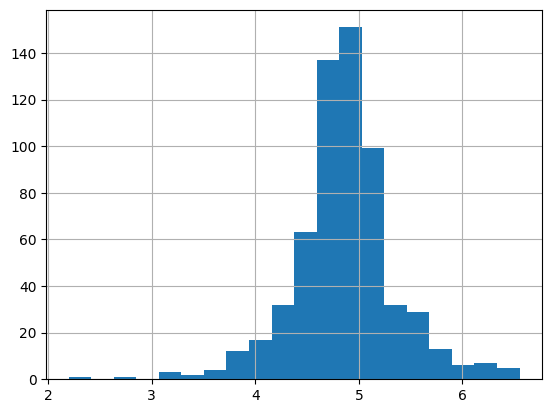

In [86]:
df["LoanAmount_log"]=np.log(df["LoanAmount"])
df["LoanAmount_log"].hist(bins=20)

In [87]:
df['TotalIncome']=df['ApplicantIncome']+df['CoapplicantIncome']
df['TotalIncome_log']=np.log(df['TotalIncome'])

<Axes: >

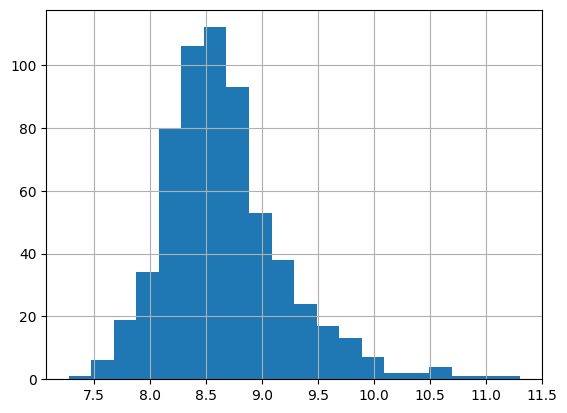

In [88]:
df['TotalIncome_log'].hist(bins=20)

In [89]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,4.852030,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,4.852030,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,4.189655,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4.787492,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,4.948760,6000.0,8.699515


In [90]:
#Splitting our dataset 
from sklearn.model_selection import train_test_split

In [91]:
X_train,X_test,Y_train,Y_test=train_test_split(df.drop(['Loan_Status','Loan_ID','ApplicantIncome','CoapplicantIncome','LoanAmount',],axis=1),df['Loan_Status'],test_size=0.2,random_state=0)

In [92]:
from sklearn.linear_model import LogisticRegression

In [93]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X=LabelEncoder()
# Encoding categorical data


In [94]:
for col in X_train.columns:
  X_train[col] = labelencoder_X.fit_transform(X_train[col])

In [95]:
X_train

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,TotalIncome,TotalIncome_log
90,1,1,0,0,0,7,1,1,80,267,267
533,1,0,1,0,0,7,1,1,130,407,407
452,1,1,0,0,0,7,0,0,97,249,249
355,0,0,0,0,0,4,1,2,65,97,97
266,1,1,2,0,0,7,1,1,98,276,276
...,...,...,...,...,...,...,...,...,...,...,...
277,1,1,0,0,0,7,1,2,32,142,142
9,1,1,1,0,0,7,1,1,168,447,447
359,1,1,3,0,0,7,1,1,131,363,363
192,1,1,0,1,0,7,1,2,107,273,273


In [96]:
labelencoder_y=LabelEncoder()
Y_train=labelencoder_y.fit_transform(Y_train)

In [97]:
Y_train

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,

In [98]:
for col in X_test.columns:
  X_test[col] = labelencoder_X.fit_transform(X_test[col])

In [99]:
Y_test=labelencoder_y.fit_transform(Y_test)

In [100]:
Y_test

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1])

In [101]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
# Fit and transform the data
X_train=ss.fit_transform(X_train)
X_test=ss.fit_transform(X_test)


In [102]:
from sklearn.tree import DecisionTreeClassifier
DTC=DecisionTreeClassifier(criterion='entropy',random_state=0)
DTC.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [103]:
prediction=DTC.predict(X_test)
prediction

array([0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1])

In [105]:
from sklearn import metrics
accuracy=metrics.accuracy_score(prediction,Y_test)
accuracy

0.7317073170731707

In [107]:
from sklearn.naive_bayes import GaussianNB
NB=GaussianNB()
NB.fit(X_train,Y_train)

GaussianNB()

In [109]:
prediction=NB.predict(X_test)
prediction

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1])

In [110]:
accuracy=metrics.accuracy_score(prediction,Y_test)
accuracy

0.8292682926829268